In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime
from scipy.stats import linregress
import gmaps
from config import q_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000,180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
coordinates = list(lat_lngs)

In [4]:
#create a list for holding the cities
cities = []
#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)

648

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 33.13,
  'feels_like': 29.39,
  'temp_min': 29.26,
  'temp_max': 35.94,
  'pressure': 1014,
  'humidity': 79},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 311, 'gust': 8.99},
 'clouds': {'all': 75},
 'dt': 1638342902,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1638359654,
  'sunset': 1638393176},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
   
    #log the url, record and set number and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | shingu
Processing Record 4 of Set 1 | saleaula
City not found. Skipping...
Processing Record 5 of Set 1 | tawkar
City not found. Skipping...
Processing Record 6 of Set 1 | kirkby
Processing Record 7 of Set 1 | valparaiso
Processing Record 8 of Set 1 | bollene
Processing Record 9 of Set 1 | tyumentsevo
Processing Record 10 of Set 1 | constitucion
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | hammerfest
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | tautira
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | evensk
Processing Record 18 of Set 1 | jutai
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | phan thiet
Processing

Processing Record 37 of Set 4 | tabarqah
City not found. Skipping...
Processing Record 38 of Set 4 | ancud
Processing Record 39 of Set 4 | bubaque
Processing Record 40 of Set 4 | pontes e lacerda
Processing Record 41 of Set 4 | ahuimanu
Processing Record 42 of Set 4 | iquitos
Processing Record 43 of Set 4 | stillwater
Processing Record 44 of Set 4 | karamea
City not found. Skipping...
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 4 | rocha
Processing Record 48 of Set 4 | kruisfontein
Processing Record 49 of Set 4 | altay
Processing Record 50 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 1 of Set 5 | okha
Processing Record 2 of Set 5 | kodiak
Processing Record 3 of Set 5 | provideniya
Processing Record 4 of Set 5 | samusu
City not found. Skipping...
Processing Record 5 of Set 5 | khani
Processing Record 6 of Set 5 | jurm
Processing Record 7 of Set 5 | zhicheng
Proce

Processing Record 23 of Set 8 | kapustin yar
Processing Record 24 of Set 8 | tateyama
Processing Record 25 of Set 8 | soyo
Processing Record 26 of Set 8 | kodinsk
Processing Record 27 of Set 8 | lompoc
Processing Record 28 of Set 8 | tholen
Processing Record 29 of Set 8 | ixtapa
Processing Record 30 of Set 8 | wanlaweyn
Processing Record 31 of Set 8 | wad rawah
Processing Record 32 of Set 8 | novyye gorki
Processing Record 33 of Set 8 | puerto quijarro
Processing Record 34 of Set 8 | listvyanka
Processing Record 35 of Set 8 | imbituba
Processing Record 36 of Set 8 | orapa
Processing Record 37 of Set 8 | omsukchan
Processing Record 38 of Set 8 | kitimat
Processing Record 39 of Set 8 | dalby
Processing Record 40 of Set 8 | saint-louis
Processing Record 41 of Set 8 | tunduru
City not found. Skipping...
Processing Record 42 of Set 8 | yangliuqing
Processing Record 43 of Set 8 | karamay
City not found. Skipping...
Processing Record 44 of Set 8 | ulaanbaatar
Processing Record 45 of Set 8 | c

Processing Record 10 of Set 12 | bossembele
City not found. Skipping...
Processing Record 11 of Set 12 | nchelenge
Processing Record 12 of Set 12 | prince rupert
Processing Record 13 of Set 12 | ponta delgada
Processing Record 14 of Set 12 | dujuma
City not found. Skipping...
Processing Record 15 of Set 12 | canavieiras
Processing Record 16 of Set 12 | marsa matruh
Processing Record 17 of Set 12 | goundam
Processing Record 18 of Set 12 | dubbo
Processing Record 19 of Set 12 | yakima
Processing Record 20 of Set 12 | barcelos
Processing Record 21 of Set 12 | hoganas
Processing Record 22 of Set 12 | othonoi
City not found. Skipping...
Processing Record 23 of Set 12 | byumba
Processing Record 24 of Set 12 | dunedin
Processing Record 25 of Set 12 | hornepayne
Processing Record 26 of Set 12 | korla
Processing Record 27 of Set 12 | morant bay
Processing Record 28 of Set 12 | buenos aires
Processing Record 29 of Set 12 | naze
Processing Record 30 of Set 12 | chaman
Processing Record 31 of Set 

In [9]:
len(city_data)

574

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,67.95,93,40,7.87,EC,2021-12-01 07:18:20
1,Tasiilaq,65.6145,-37.6368,17.33,86,100,9.28,GL,2021-12-01 07:18:21
2,Shingu,33.7333,135.9833,50.99,58,3,17.60,JP,2021-12-01 07:18:22
3,Kirkby,53.4833,-2.9000,48.02,86,75,8.01,GB,2021-12-01 07:18:22
4,Valparaiso,-33.0393,-71.6273,56.84,76,75,3.44,CL,2021-12-01 07:18:23
5,Bollene,44.2848,4.7530,40.08,93,0,2.30,FR,2021-12-01 07:18:23
6,Tyumentsevo,53.3224,81.4980,21.15,86,7,8.19,RU,2021-12-01 07:18:24
7,Constitucion,-35.3333,-72.4167,52.66,90,74,4.07,CL,2021-12-01 07:18:24
8,Port Elizabeth,-33.9180,25.5701,73.09,77,90,11.50,ZA,2021-12-01 07:18:25
9,Hammerfest,70.6634,23.6821,23.45,93,75,12.66,NO,2021-12-01 07:18:25


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2021-12-01 07:18:20,-0.7393,-90.3518,67.95,93,40,7.87
1,Tasiilaq,GL,2021-12-01 07:18:21,65.6145,-37.6368,17.33,86,100,9.28
2,Shingu,JP,2021-12-01 07:18:22,33.7333,135.9833,50.99,58,3,17.60
3,Kirkby,GB,2021-12-01 07:18:22,53.4833,-2.9000,48.02,86,75,8.01
4,Valparaiso,CL,2021-12-01 07:18:23,-33.0393,-71.6273,56.84,76,75,3.44
...,...,...,...,...,...,...,...,...,...
569,Dauriya,RU,2021-12-01 07:34:32,49.9333,116.8667,17.01,85,17,13.04
570,Envira,BR,2021-12-01 07:34:32,-7.3000,-70.2167,70.18,100,99,2.04
571,Kabanjahe,ID,2021-12-01 07:34:33,3.1001,98.4908,75.81,60,33,6.46
572,Bakel,SN,2021-12-01 07:34:33,14.9050,-12.4568,75.11,25,11,8.05


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

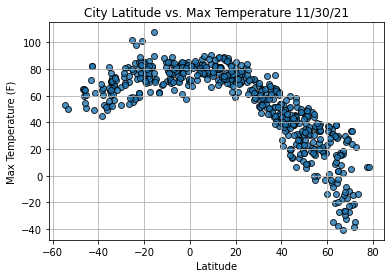

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

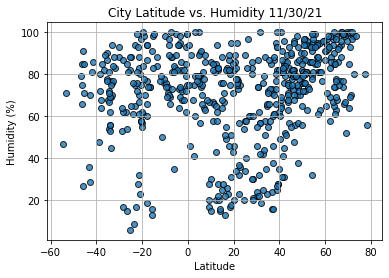

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


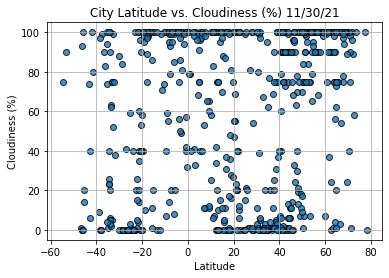

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

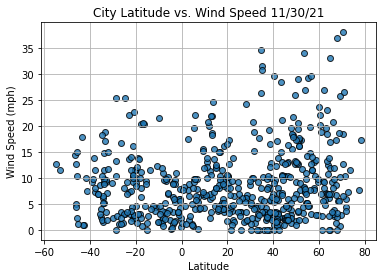

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

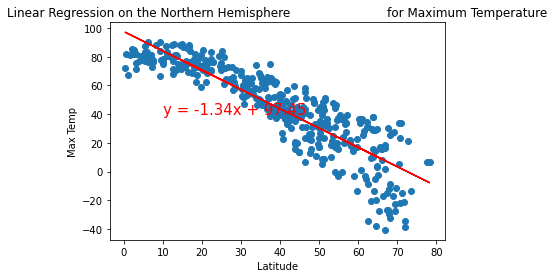

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


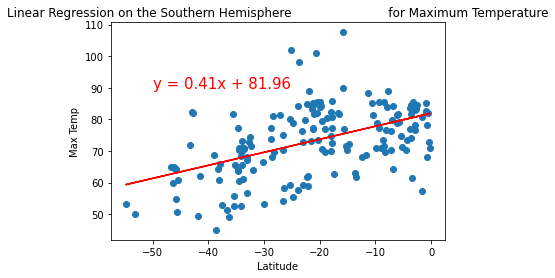

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

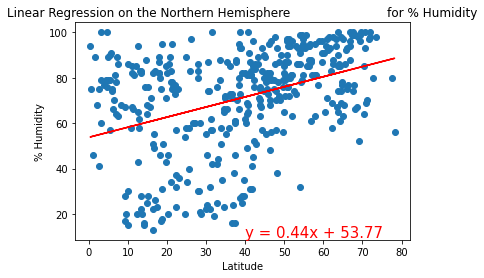

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


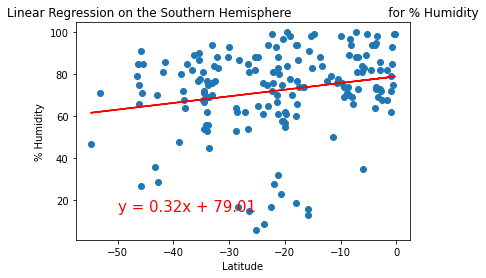

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

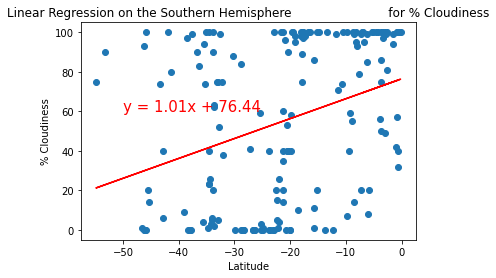

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


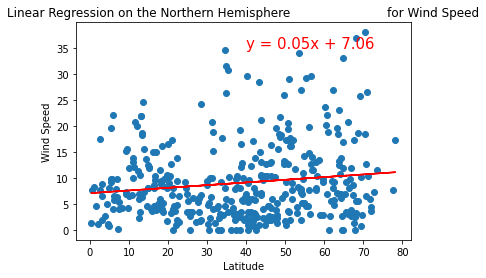

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

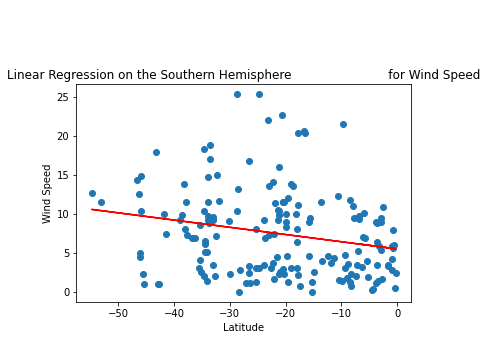

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))


In [28]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Puerto Ayora,EC,2021-12-01 07:18:20,-0.7393,-90.3518,67.95,93,40,7.87
1,1,Tasiilaq,GL,2021-12-01 07:18:21,65.6145,-37.6368,17.33,86,100,9.28
2,2,Shingu,JP,2021-12-01 07:18:22,33.7333,135.9833,50.99,58,3,17.60
3,3,Kirkby,GB,2021-12-01 07:18:22,53.4833,-2.9000,48.02,86,75,8.01
4,4,Valparaiso,CL,2021-12-01 07:18:23,-33.0393,-71.6273,56.84,76,75,3.44


In [29]:
#confirm data types 
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [30]:
#configure gmaps to use API key
gmaps.configure(api_key=q_key)

In [31]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig


In [32]:
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

In [33]:
plt.show()